<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Proposed-Solution" data-toc-modified-id="Proposed-Solution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Proposed Solution</a></span><ul class="toc-item"><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Algorithms</a></span></li><li><span><a href="#Evaluating-Model-Performance" data-toc-modified-id="Evaluating-Model-Performance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluating Model Performance</a></span></li></ul></li></ul></div>

# Problem Statement

We are aiming to put our skills to the test and ...

# Data Description

The data we're using has been taken from the CSSE/JHU dataset available on Github. Stored locally.

Now, we're going to plot the number of reported cases in Hubei (ground zero) against time.

In [149]:
import glob
import pandas as pd
from matplotlib import pyplot as plt
import math
from datetime import timedelta

In [62]:
# ========================== #
# to help with reading files #
# ========================== #
def data_reader(month):
    # input '01' for January, '02' for February and so on
    # returns a list of dataframes containing all the information pertaining to that month
    filenames = glob.glob("../../covid_data/{}*.csv".format(month))
    timeseries = [s[17:27] for s in filenames]
    list_of_dfs = [pd.read_csv(filename) for filename in filenames]
    for i in range(len(list_of_dfs)):
        list_of_dfs[i]['time'] = pd.to_datetime(timeseries[i])
    return list_of_dfs

# =========================================================== #
# Plotting confirmed cases against no. of days since outbreak #
# =========================================================== #
def provincePlot(province, data):
    df = pd.DataFrame(columns=['Confirmed', 'Deaths', 'Recovered', 'time'])
    df = pd.concat([df, data[data['Province/State'] == province].loc[:,['Confirmed', 'Deaths','Recovered','time']]], ignore_index=True)
    df = df.sort_values('time').reset_index()
    plt.figure(figsize=(15, 6))
    plt.xlabel('Timestamp', fontsize=14)
    plt.ylabel('No. of confirmed cases', fontsize=14)
    plt.plot(
        df['Confirmed'],
        marker = 'x',
        linestyle=''
    )

def countryPlot(country, data):
    df = pd.DataFrame(columns=['Confirmed', 'Deaths', 'Recovered', 'time'])
    df = pd.concat([df, data[data['Country/Region'] == country].loc[:,['Confirmed', 'Deaths','Recovered','time']]], ignore_index=True)
    df = df.sort_values('time').reset_index()
    plt.figure(figsize=(15, 6))
    plt.xlabel('Timestamp', fontsize=14)
    plt.ylabel('No. of confirmed cases', fontsize=14)
    plt.plot(
        df['Confirmed'],
        marker = 'x',
        linestyle=''
    )

In [175]:
# ============= #
# Cost Function #
# ============= #
# def computeCost(theta):
#     # L (ceiling of our logistic function) = 67786
#     L = 67786
#     m = data.shape[0] # number of training examples
#     n = 1 # we have only one feature, days since the beginning of the outbreak
#     cost = 0
#     for row in range(m):
#         hyp = 0
#         hyp += (L/(1 + theta[0] * (math.e ** (theta[1] * data.values[row][9].days))))
#         cost_temp = (hyp - data.values[row][0])**2
#         cost += cost_temp
#     cost *= 0.5
#     cost /= m
#     return round(cost, 2)

# ================ #
# Gradient Descent #
# ================ #
def gradientDescent(theta, alpha, iterations):
    m = data.shape[0] # number of training examples
    n = 1
    L = 67786
    for i in range(iterations):
        total0 = 0
        total1 = 0
        for row in range(m):
            hyp = 0
            hyp += (L/(1 + theta[0] * (math.e ** (theta[1] * data.values[row][-1].days))))
            load = hyp - data.values[row][2]
            total0 += load * data.values[row][2]
            total1 += load * data.values[row][2]
        temp0 = theta[0] - ((alpha * total0)/m)
        temp1 = theta[1] - ((alpha * total1)/m)
        theta = [round(temp0, 4), round(temp1, 4)]
    return theta

In [93]:
january = data_reader('01')
february = data_reader('02')
march = data_reader('03')
data = january[0]
for df in january[1:] + february + march:
    data = pd.concat([data, df])

/Users/mehuljangir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [94]:
data['days'] = data.time - min(data.time)
data = data[data['Province/State'] == 'Hubei']

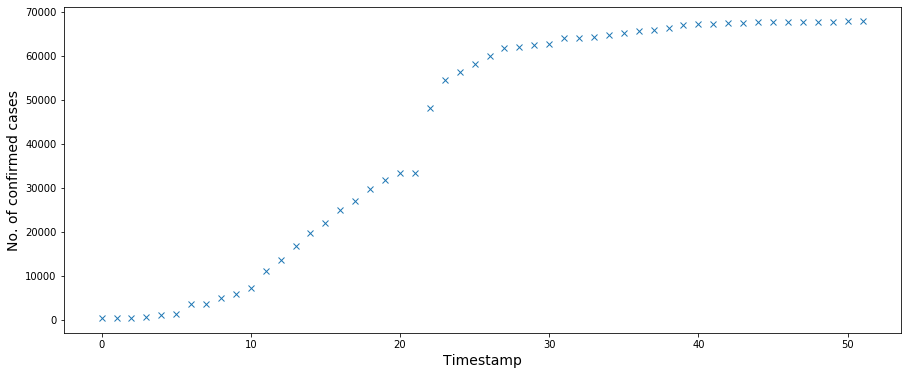

In [74]:
provincePlot('Hubei', data)

In [75]:
m = data.shape[0]
print("no. of training examples| {}".format(m))

no. of training examples| 52


In [76]:
alpha = 0.01
iterations = 1500

In [176]:
theta = [0, 0]
features = list()
for i in data.days:
    features.append(i.days)
target = list(data.Confirmed)
theta = gradientDescent(theta, alpha, iterations)

In [177]:
theta

[-5523631601.0769, -5523631601.0769]

In [87]:
theta

[-5523631601.0769, -5523631601.0769]

In [186]:
features = list()
for i in data.days:
    features.append(i.days)
output = list()
for f in features:
     val = 67786/(1 + 0.1 * (math.e ** (-.002 * f)))
     output.append(val)
output[:5]

[61623.63636363636,
 61634.831497770116,
 61646.00832019223,
 61657.166853495466,
 61668.30712027169]

# Proposed Solution

## Algorithms

## Evaluating Model Performance